# word2vecとは
word2vecは、大量のテキストデータを解析し、各単語の意味をベクトル表現化する手法です。単語をベクトル化することで、

単語同士の意味の近さを計算　　
単語同士の意味を足したり引いたり　　
ということが可能になります。

word2vecは以前説明したカウントベースとは違い、単語の数を計算するだけではなく深層学習を用いることで、上記のような単語の意味を計算することが可能になりました。

# word2vecの主要モデル

word2vecには大きく分けて  
**・CBOW**  
**・Skip-Gram Model**  
という2つの手法があります。  

** Skip-Gram Model **
Skip-Gram Modelでは、入力された単語を元に周辺語を出力する、入力層・隠れ層・出力層のみのシンプルなニューラルネットを考えます。  
中心の単語からその文脈を構成する単語を推定します。  
単語と文脈をデータからランダムに選択することで容易に負例を生成でき, 正例と負例を分類する分類器を学習させます。  
この時に隠れ層の入力データの特徴を低次元で表現したベクトルを取り出します。  
真面目に行列計算すると膨大な計算量になるので, 巨大な行列の一部を取り出して近似計算する低ランク近似というテクニックを使っています。  
CBOW と比較し低頻度語の予測に優れています。

**CBOW**
CBOW (Continuous Bag-of-Words) は単語周辺の文脈から中心の単語を推定します。  
着目している単語の前後計 n 単語を文脈として入力して, 着目している単語 (Wt) を推定します。  
そのため入力層が普通のNNと違いN層になるのが特徴です。  
Skip-gram と比較し高速です。


# embedding
embeddingとは**単語の埋め込み**という用語に由来します。  
つまりこのEmbeddingレイヤに単語の埋め込み(分散表現)と訳されます。  
自然言語処理の分野では、単語の密なベクトル表現は、単語の埋め込み(word embedding)や、単語の分散表現とよばれています。  

# 実装は別途ファイルで行なっています。

In [1]:
import sys
sys.path.append("..")
import numpy as np
from common.layers import MatMul
from common.util import *

# コーパス作り

In [2]:
# サンプルのコンテキスト
c0 = np.array([[1,0,0,0,0,0,0]])
c1= np.array([[0,0,1,0,0,0,0]])

# 重みの初期化
W_in = np.random.randn(7,3)
W_out = np.random.randn(3,7)

# レイヤの生成
in_layer0 = MatMul(W_in)
in_layer1 = MatMul(W_in)
out_layer = MatMul(W_out)

# forword
h0 = in_layer0.forward(c0)
h1 = in_layer1.forward(c1)

h = 0.5 * (h0 + h1)
s = out_layer.forward(h)

In [3]:
text = "You say goodbye and I say hello."
corpus, word_to_id, id_to_word = preprocess(text)

print(corpus)

[0 1 2 3 4 1 5 6]


In [4]:
id_to_word

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}

In [5]:
contexts,target = create_contexts_target(corpus,window_size=1)

In [6]:
contexts,target

(array([[0, 2],
        [1, 3],
        [2, 4],
        [3, 1],
        [4, 5],
        [1, 6]]), array([1, 2, 3, 4, 1, 5]))

In [7]:
vocab_size = len(word_to_id)
target  = convert_one_hot(target,vocab_size)

In [8]:
contexts = convert_one_hot(contexts, vocab_size)

In [9]:
target

array([[0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0]], dtype=int32)

In [10]:
contexts

array([[[1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0]],

       [[0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0]],

       [[0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0]],

       [[0, 0, 0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 0]],

       [[0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1]]], dtype=int32)

In [11]:
from common.trainer import Trainer
from common.optimizer import Adam
from simple_cbow import *

In [12]:
window_size = 1
hidden_size = 5
bach_size = 3
max_epoch = 1000

In [13]:
model = SimpleCBOW(vocab_size,hidden_size)

In [14]:
optimizer = Adam()

# CBOWで学習

| epoch 1 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 2 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 3 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 4 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 5 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 6 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 7 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 8 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 9 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 10 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 11 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 12 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 13 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 14 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 15 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 16 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 17 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 18 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 19 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 20 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 21 |  iter 1 / 2 | ti

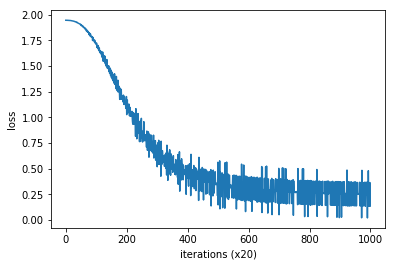

In [15]:
trainer = Trainer(model,optimizer)

trainer.fit(contexts, target, max_epoch, bach_size)
trainer.plot()

In [16]:
word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
    print(word, word_vecs[word_id])

you [-0.86109483  1.0187739  -0.94437975 -0.8598252   0.93604445]
say [ 1.0951526  1.0879331 -1.1195226  1.1491785 -1.1083524]
goodbye [-0.97328484 -1.0980937   1.1558944  -1.0492778   1.0982839 ]
and [-0.9225322 -1.0655762 -1.0530741 -0.9303187 -1.1746042]
i [-0.86652666  1.0177834  -0.9394676  -0.8844939   0.92852694]
hello [-0.00256207  0.00593234  0.00559369  0.01646352 -0.01157492]
. [-0.00078131 -0.01139746 -0.01201075  0.00114048  0.00737456]
